In [43]:
# Import libraries for data cleaning, analysis, and visualization

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline


In [44]:
# Create our headers for the dataframe
headers = ['States', '2015', '2016', '2017', '2016(b)', '2017(b)']

In [45]:
# Read in our pce file.
df = pd.read_csv(r"C:\Users\Aarons\Downloads\pce1018.csv", sep=',', names=headers)
pce = df[3:61] # Filter dataset to display only states.
pce.head()

,States,2015,2016,2017,2016(b),2017(b)
3,New England,"699,549","721,077","748,431",3.1,3.8
4,Connecticut,"172,445","176,372","181,992",2.3,3.2
5,Maine,"54,289","55,839","57,930",2.9,3.7
6,Massachusetts,"338,224","350,556","365,405",3.6,4.2
7,New Hampshire,"63,087","64,966","67,496",3.0,3.9


In [46]:
# Let's look at the end of our rows of States.
pce.tail()

,States,2015,2016,2017,2016(b),2017(b)
56,Alaska,"33,504","34,332","35,537",2.5,3.5
57,California,"1,589,353","1,671,196","1,754,083",5.1,5.0
58,Hawaii,"60,117","62,807","65,768",4.5,4.7
59,Nevada,"109,976","114,473","119,339",4.1,4.3
60,Oregon,"152,837","160,525","169,046",5.0,5.3


In [47]:
pce = pce.reset_index()
pce.head()

,index,States,2015,2016,2017,2016(b),2017(b)
0,3,New England,"699,549","721,077","748,431",3.1,3.8
1,4,Connecticut,"172,445","176,372","181,992",2.3,3.2
2,5,Maine,"54,289","55,839","57,930",2.9,3.7
3,6,Massachusetts,"338,224","350,556","365,405",3.6,4.2
4,7,New Hampshire,"63,087","64,966","67,496",3.0,3.9


In [48]:
# Take a look at the size of our dataset.
# More than 50 states, will further examine.
pce.shape

(58, 7)

In [49]:
# Take a look at our columns.
pce.columns

Index(['index', 'States', '2015', '2016', '2017', '2016(b)', '2017(b)'], dtype='object')

In [50]:
# Drop all of the rows that are not individual states.
pce = pce.drop([7])

In [51]:
pce = pce.drop([9])

In [52]:
pce = pce.drop([14])

In [53]:
pce = pce.drop([20])

In [54]:
pce = pce.drop([28])

In [55]:
pce = pce.drop([41])

In [56]:
pce = pce.drop([46])

In [57]:
pce = pce.drop([52])

In [58]:
# Now our dataset is down to 50 states.
pce.shape

(50, 7)

In [59]:
# Check for any null values.
pce.isnull().sum()

index      0
States     0
2015       0
2016       0
2017       0
2016(b)    0
2017(b)    0
dtype: int64

In [60]:
pce.describe()

,index,2016(b),2017(b)
count,50.000000,50.000000,50.000000
mean,31.720000,3.426000,4.012000
std,16.970611,1.198095,0.989669
min,3.000000,-0.800000,2.000000
25%,18.250000,2.700000,3.225000
50%,32.500000,3.600000,3.900000
75%,45.750000,4.100000,4.600000
max,60.000000,6.500000,6.900000


In [61]:
# Find out what the summary statistics for the dataset.
pce['States'].describe()

count          50
unique         50
top       Arizona
freq            1
Name: States, dtype: object

In [62]:
pce.apply(pd.to_numeric, axis=1, errors='ignore').head()

,index,States,2015,2016,2017,2016(b),2017(b)
0,3,New England,"699,549","721,077","748,431",3.1,3.8
1,4,Connecticut,"172,445","176,372","181,992",2.3,3.2
2,5,Maine,"54,289","55,839","57,930",2.9,3.7
3,6,Massachusetts,"338,224","350,556","365,405",3.6,4.2
4,7,New Hampshire,"63,087","64,966","67,496",3.0,3.9


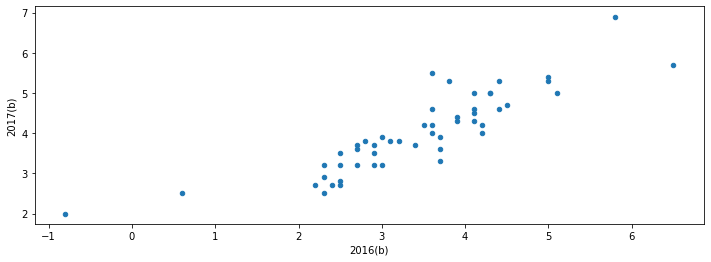

In [63]:
pce.plot(kind='scatter', x='2016(b)', y='2017(b)',figsize=(12,4));
plt.savefig('PCE')

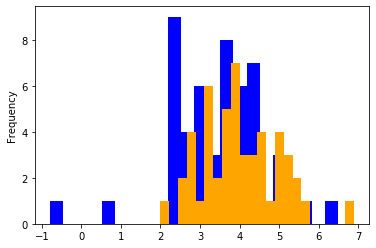

In [64]:
pce['2016(b)'].plot(kind='hist', bins=22, color='blue');
pce['2017(b)'].plot(kind='hist',bins=22, color='orange');
plt.savefig('PCE_hist')

In [65]:
!pip install plotly
!pip install chart_studio
import chart_studio
import plotly.express as px
import plotly.graph_objects as go

In [66]:
fig1 = px.bar(pce, x="States", y="2016(b)", color="2017(b)", barmode="group")
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig1.show()

In [67]:
pce_2016 = pce.sort_values(by=['2016(b)'],ascending=True, inplace=True)
pce_2016

In [68]:
pce_2017 = pce.sort_values(by=['2017(b)'],ascending=True, inplace=True)

In [81]:
fig2 = px.bar(pce, x="States", y="2016(b)", color="2017(b)", barmode="group")
fig2.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig2.show()

fig3 = px.bar(pce, x="States", y="2017(b)", color="2016(b)", barmode="group")
fig3.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig3.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig3.show()

In [70]:

fig4 = px.bar(pce, x="States", y="2017(b)", color="2016(b)", barmode="group")
fig4.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig4.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig4.show()

In [67]:
pce['2016(b)'].mean()

3.426

In [68]:
pce['2017(b)'].mean()

4.0120000000000005

In [69]:
print(pce['2016(b)'].std(ddof=1))
print(pce['2017(b)'].std(ddof=1))

1.1980954273601185
0.9896690850780294


In [84]:
scatter = px.scatter(pce, x='States', y='2016(b)'
                 ,size='2017(b)')
scatter.update_layout(template='plotly_white')
scatter.update_layout(title='Total Personal Consumption Expenditures by State')
scatter.show()

In [42]:
import plotly.io as pio
pio.write_html(fig, file='PCE_hist.html', auto_open=True)